In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)

In [10]:
Mcolumns = inspector.get_columns("Measurement")
for column in Mcolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
Scolumns = inspector.get_columns("Station")
for column in Scolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set
mostrecent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
mostrecent

('2017-08-23')

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
pastyear = dt.date(2017,8, 23) - dt.timedelta(days = 365)

In [14]:
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > pastyear).\
order_by(Measurement.date).all()

In [15]:
# Save the query results as a Pandas DataFrame 
precip_df = pd.DataFrame(precip)
precip_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


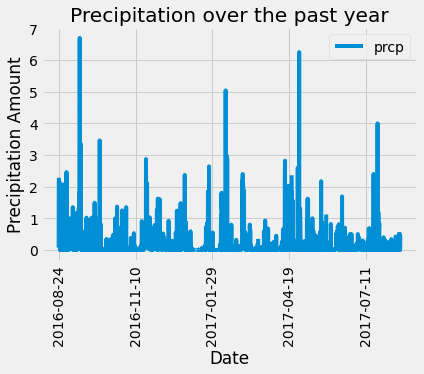

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot('date', 'prcp')
plt.xticks(rotation="vertical")
plt.title("Precipitation over the past year")
plt.xlabel("Date")
plt.ylabel("Precipitation Amount")
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [19]:
#First join both tables so that statistics can be captured for all precipitation data
coldata = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
alldata = session.query(*coldata).filter(Measurement.station == Station.station).all()
alldata_df = pd.DataFrame(alldata)
alldata_df

,station,date,prcp,tobs,station,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65.0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63.0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74.0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76.0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73.0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,USC00516128,2017-08-20,NaN,78.0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,USC00516128,2017-08-21,0.56,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,USC00516128,2017-08-22,0.50,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [20]:
#Now that all data is joined, show statistics for all data
alldata_df.describe()

,prcp,tobs,latitude,longitude,elevation
count,18103.000000,19550.000000,19550.000000,19550.000000,19550.000000
mean,0.160644,73.097954,21.382151,-157.839901,39.858363
std,0.468746,4.523527,0.079017,0.085735,64.987876
min,0.000000,53.000000,21.271600,-158.011100,0.900000
25%,0.000000,70.000000,21.333100,-157.848890,7.000000
50%,0.010000,73.000000,21.335560,-157.816800,14.600000
75%,0.110000,76.000000,21.451670,-157.801500,32.900000
max,11.530000,87.000000,21.521300,-157.711390,306.600000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
stationcnt = session.query(Station).count()
stationcnt

9

In [29]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostactivity = (session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
most_active = mostactivity[0][0]

print("Below is a list of stations and observation counts in descending order.")
for stat, obs in mostactivity:
    print("The station " + stat + " had " + str(obs) + " observations.")

Below is a list of stations and observation counts in descending order.
The station USC00519281 had 2772 observations.
The station USC00519397 had 2724 observations.
The station USC00513117 had 2709 observations.
The station USC00519523 had 2669 observations.
The station USC00516128 had 2612 observations.
The station USC00514830 had 2202 observations.
The station USC00511918 had 1979 observations.
The station USC00517948 had 1372 observations.
The station USC00518838 had 511 observations.


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = mostactivity[0][0]
most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"Most Active Station Temperatures")
print(f"Low: {most_active_temps[0][0]} High: {most_active_temps[0][1]} Average: {round(most_active_temps[0][2], 1)}")

Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


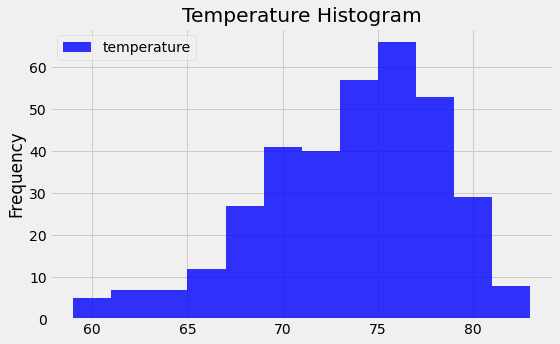

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_temps_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_temps_station= most_temps_station[0]

temp_obs = session.query(Measurement.tobs).filter(Measurement.date >= pastyear).filter(Measurement.station == most_temps_station).all()
temp_obs = pd.DataFrame(temp_obs, columns=['temperature'])
temp_obs.plot.hist(bins=12, title="Temperature Histogram",color='blue', alpha=0.8, figsize=(8,5))
plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.show()

# Close session

In [28]:
# Close Session
session.close()